In [1]:
!python inference.py --conf configs/kwmlp_ksc_tts.yaml --ckpt runs/kw-mlp-0.2.0-ksc-tts/best.pth --inp data/ --out outputs/ksc_tts/ --lmap label_map.json --device cpu --batch_size 32
                    

100%|█████████████████████████████████████████| 114/114 [00:17<00:00,  6.53it/s]
Saved preds to outputs/ksc_tts/preds.json


In [2]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [3]:
labels = ["backward", "forward", "right", "left", "down", "up", "go", "stop", "on", "off", "yes", "no", 
          "learn", "follow", "zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
          "bed", "bird", "cat", "dog", "happy", "house", "read", "write", "tree", "visual", "wow"]

In [4]:
def evaluate(preds_path, labels):
    # groundtruth and predicted 
    # labels
    y_true = []
    y_pred = []

    # opening a JSON file
    f = open(preds_path)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)

    # iterating through the json list
    # and adding true and predicted labels
    for t, p in data.items():
        t = t.split('/')[-2]
        y_true.append(t)
        y_pred.append(p)

    # closing file
    f.close()

    # generate the classification report
    print(classification_report(y_true,y_pred, digits=4))

    # generate a confusion matrix in %
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    cmn = np.round(cmn,1)

    # plot the confusion matrix in a beautiful manner
    fig = plt.figure(figsize=(16, 16))
    ax= plt.subplot()
    sns.heatmap(cmn, annot=True, ax = ax, fmt=".1f", linewidth=.1, 
                cmap='YlGn', cbar=False, square=True, linecolor='white')
    
    # labels, title, and ticks
    ax.set_xlabel('Predicted commands', fontsize=14)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(labels, fontsize=12)
    ax.xaxis.tick_bottom()
    ax.set_ylabel('Actual commands', fontsize=14)
    ax.yaxis.set_ticklabels(labels, fontsize=12)
    plt.yticks(rotation=0)
    plt.title('Confusion Matrix', fontsize=16)
    plt.savefig("confusion_matrix.png")
    plt.show()

              precision    recall  f1-score   support

    backward     0.9397    0.9646    0.9520       113
         bed     0.9684    0.9485    0.9583        97
        bird     0.7642    0.8438    0.8020        96
         cat     0.9314    0.9794    0.9548        97
         dog     0.6497    1.0000    0.7876       102
        down     0.8972    0.9412    0.9187       102
       eight     0.9802    0.9612    0.9706       103
        five     0.9894    0.8942    0.9394       104
      follow     0.9083    0.9519    0.9296       104
     forward     0.8750    0.8750    0.8750       112
        four     0.9487    0.7629    0.8457        97
          go     0.8349    0.9010    0.8667       101
       happy     0.9688    0.9208    0.9442       101
       house     1.0000    0.5607    0.7186       107
       learn     0.8750    0.9074    0.8909       108
        left     0.8704    0.9038    0.8868       104
        nine     0.9783    0.9000    0.9375       100
          no     1.0000    

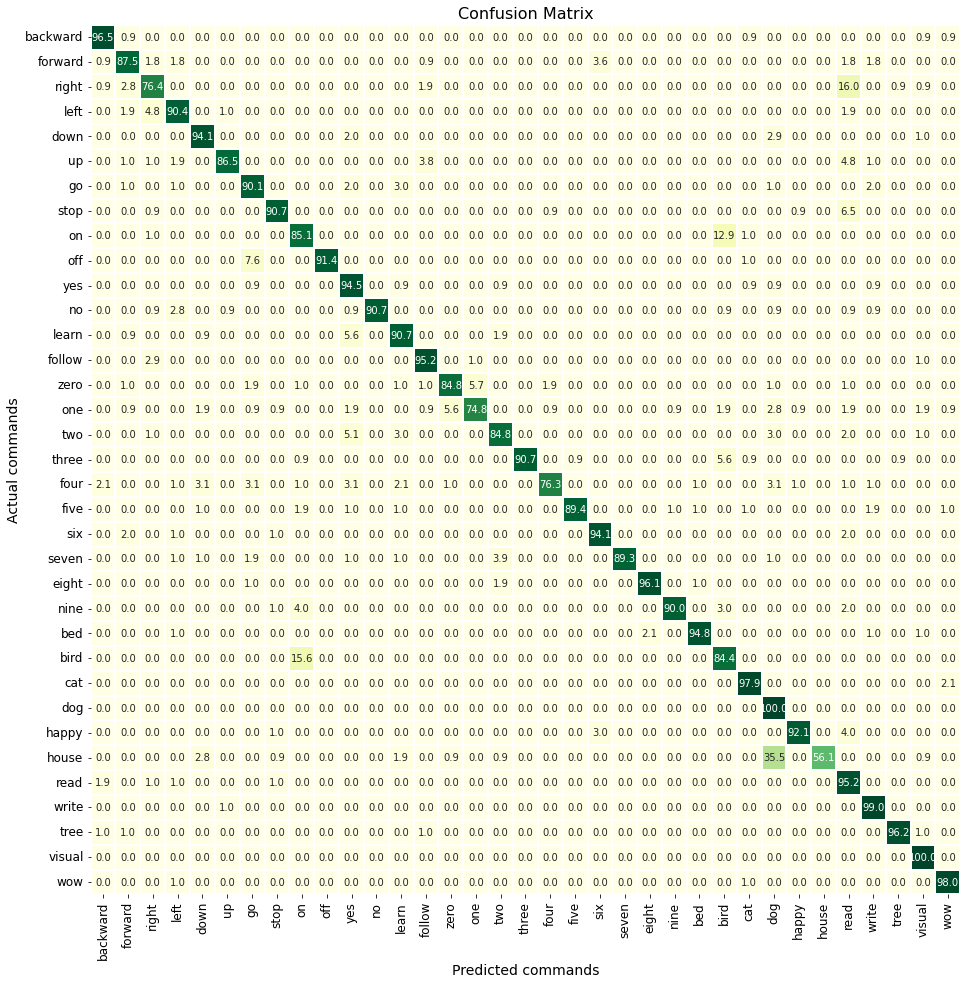

In [5]:
evaluate('outputs/ksc_tts/preds.json', labels)